In [16]:
import pandas as pd

file_path = '../Datasets/'
file_name = 'task1-final_dataset.csv'
file_path += file_name

# Load the dataset
df = pd.read_csv(file_path)
df['index'] = df.index + 1
df = df[df['has_entity'] != 'data missing']
df['difficult_words'] = df['difficult_words'].fillna(df['difficult_words'].mean())
df['lexicon_count'] = df['lexicon_count'].fillna(df['lexicon_count'].mean())

# Filter the dataset for rows where 'text_clarity' is null
filtered_df = df[df['text_clarity'].isnull()]

# Select the first 100 data points
selected_data = filtered_df.head(100)
print('Fetched',len(selected_data), 'data points.')
def print_column_names(df):
    print("\nPresent columns:\n")
    column_names = df.columns.tolist()
    for column in column_names:
        print(column)

print_column_names(selected_data)

# Prepare to print 'index', 'category', and 'paragraph' column values
for index, row in selected_data.iterrows():
    print(f"Index:\n{row['index']}\n")
    print(f"Category:\n{row['category']}\n")
    print(f"Paragraph:\n{row['paragraph']}\n")
    print("----------\n")

Fetched 100 data points.

Present columns:

par_id
paragraph
has_entity
lexicon_count
difficult_words
last_editor_gender
category
text_clarity
index
Index:
10

Category:
biographies

Paragraph:
Pepys' diary provides a first-hand account of the Restoration, and includes detailed accounts of several major events of the 1660s, along with the lesser known diary of John Evelyn. In particular, it is an invaluable source for the study of the Second Anglo-Dutch War of 1665–7, the Great Plague of 1665, and the Great Fire of London in 1666. In relation to the Plague and Fire, C. S. Knighton has written: "From its reporting of these two disasters to the metropolis in which he thrived, Pepys's diary has become a national monument." Robert Latham, editor of the definitive edition of the diary, remarks concerning the Plague and Fire: "His descriptions of both—agonisingly vivid—achieve their effect by being something more than superlative reporting; they are written with compassion. As always with Pe

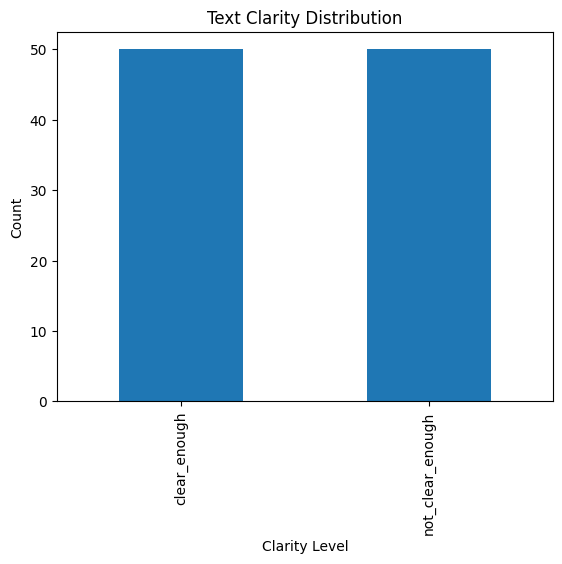

Labeled dataset saved to ..\Datasets\labeled_dataset.csv


,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity,index
9,79225005859,Pepys' diary provides a first-hand account of ...,ORG_NO_PRODUCT_YES_PERSON_YES_,139,31.0,man,biographies,clear_enough,10
10,959908012329,"Looking ahead, the current progress in data-to...",ORG_NO_PRODUCT_NO_PERSON_NO_,70,22.0,woman,artificial intelligence,not_clear_enough,11
11,123020006718,"Real-time programs such as simulations, flight...",ORG_NO_PRODUCT_NO_PERSON_NO_,84,38.0,man,programming,not_clear_enough,12
12,113961006578,"Darwin was the inventor of several devices, th...",ORG_NO_PRODUCT_NO_PERSON_YES_,35,8.0,woman,biographies,clear_enough,13
13,8471004175,He was among the first British troops into bo...,ORG_YES_PRODUCT_NO_PERSON_YES_,214,46.0,man,biographies,clear_enough,14
...,...,...,...,...,...,...,...,...,...
104,7628004101,"With its rich set of operators, the C language...",ORG_YES_PRODUCT_NO_PERSON_NO_,49,12.0,man,programming,clear_enough,105
105,220520007855,"Here, he appears to give his support to the a...",ORG_YES_PRODUCT_YES_PERSON_YES_,190,51.0,man,philosophy,not_clear_enough,106
106,83427000844,Several revisions of the language have appeare...,ORG_NO_PRODUCT_NO_PERSON_NO_,37,8.0,man,programming,clear_enough,107
107,430941009538,He was an invited speaker in the International...,ORG_YES_PRODUCT_NO_PERSON_YES_,83,26.0,man,biographies,not_clear_enough,108


In [18]:
# Update the labeling function to handle cases with zero lexicon count
def label_clarity_corrected(row):
    # If lexicon count is 0, avoid division by zero by defaulting to 'clear_enough'
    if row['lexicon_count'] == 0:
        return 'clear_enough'
    # Apply the original criterion with a safeguard against division by zero
    elif row['difficult_words'] / row['lexicon_count'] > 0.25:
        return 'not_clear_enough'
    else:
        return 'clear_enough'

# Reapply the labeling function with the corrected logic
selected_data.loc[:, 'text_clarity'] = selected_data.apply(label_clarity_corrected, axis=1)

import matplotlib.pyplot as plt

clarity_counts = selected_data['text_clarity'].value_counts()
clarity_counts.plot(kind='bar')

plt.title('Text Clarity Distribution')
plt.xlabel('Clarity Level')
plt.ylabel('Count')

plt.show()

import os

output_path = os.path.join('..', 'Datasets', 'labeled_dataset.csv')
selected_data.to_csv(output_path, index=False)

print('Labeled dataset saved to', output_path)

# Check the first few labeled rows to ensure the process is working as expected
selected_data.head(100)